### Import libraries

In [2]:
import numpy as np
import os
from PIL import Image
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Task 1) Downloading ZIP file

In [22]:
import gdown

url = 'https://drive.google.com/uc?id=1ppYXeiQUQnxbxORCTbQbc3A0OU6DnXj9'
output = 'data.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ppYXeiQUQnxbxORCTbQbc3A0OU6DnXj9
From (redirected): https://drive.google.com/uc?id=1ppYXeiQUQnxbxORCTbQbc3A0OU6DnXj9&confirm=t&uuid=632974e5-ea92-4622-9486-4c3c0b7d8383
To: C:\Users\Professional\Desktop\beeline\data.zip
100%|█████████████████████████████████████████████████████████████████████████████| 89.6M/89.6M [00:19<00:00, 4.49MB/s]


'data.zip'

### Unzipping

In [23]:
import zipfile
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('data')

### Make sure that the downloaded file has the correct size because the first attempt to unzip it was unsuccessful

In [2]:
import os
print("Размер файла:", os.path.getsize('data.zip'), "байт")

Размер файла: 89627699 байт


### Use a script to check the file type because the archive could not be extracted

In [3]:
with open('data.zip', 'rb') as file:
    print(file.read(100))  # read first 100 bites

b'PK\x03\x04\n\x00\x00\x00\x00\x00\x10]\xa4V\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\x1c\x00train/UT\t\x00\x03PESdRESdux\x0b\x00\x01\x04\xfc\x03\x00\x00\x04\xfd\x03\x00\x00PK\x03\x04\x14\x00\x00\x00\x08\x00\xadX\xa4V\x9f\x90\x0fI\xd0 \x00\x00\'"\x00\x00\r\x00\x1c\x00train/'


## **https://drive.google.com/uc?id=1ppYXeiQUQnxbxORCTbQbc3A0OU6DnXj9** 
### I changed the link to this one and went back to the beginning to re-download the archive

### List the files and folders in the directory 'data'

In [5]:
import os
os.listdir('data')  

['test', 'train']

## Task 2) Data prepocessing

In [3]:
from sklearn.model_selection import train_test_split
import re

def load_images_and_labels(base_dir, target_size=(224, 224)):
    images = []
    labels = []

    pattern = re.compile(r'(\d)_\d+\.jpg$')

    for folder_name in ['train', 'test']:
        folder_path = os.path.join(base_dir, folder_name)
        for file_name in os.listdir(folder_path):
            match = pattern.search(file_name)
            if match:
                # Resizing
                img_path = os.path.join(folder_path, file_name)
                img = Image.open(img_path).resize(target_size)
                images.append(np.array(img))

                
                label = int(match.group(1))  
                labels.append(label)

    # Converting into arrays
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels


base_dir = 'data'  
images, labels = load_images_and_labels(base_dir)

# Проверка размеров массивов
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

Images shape: (10198, 224, 224, 3)
Labels shape: (10198,)


### Writing the function for extraction of images and labels inside the directory

In [5]:
def load_images_and_labels(folder_path, target_size=(224, 224)):
    images = []
    labels = []
    pattern = re.compile(r'(\d)_\d+\.jpg$')  # Регулярное выражение для извлечения класса из имени файла
    
    for file_name in os.listdir(folder_path):
        match = pattern.search(file_name)
        if match:
            img_path = os.path.join(folder_path, file_name)
            img = Image.open(img_path).resize(target_size)
            images.append(np.array(img))
            label = int(match.group(1))  # Извлечение класса возраста из имени файла
            labels.append(label)

    images = np.array(images, dtype='float32') / 255.0  # Normalization
    labels = np.array(labels)
    
    return images, labels

# Загрузка обучающих и тестовых данных
base_dir = 'data'
train_images, train_labels = load_images_and_labels(os.path.join(base_dir, 'train'))
test_images, test_labels = load_images_and_labels(os.path.join(base_dir, 'test'))

### Task 3) Creation of our neuron model

In [28]:
# Model Creation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compilation 
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fittting
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Accuracy estimation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Saving the model to our directory
model.save('age_classification_model.h5')


Epoch 1/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 291s 908ms/step - accuracy: 0.4266 - loss: 1.2405 - val_accuracy: 0.7327 - val_loss: 0.7765
Epoch 2/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.5874 - loss: 0.9286 - val_accuracy: 0.7228 - val_loss: 0.7170
Epoch 3/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.6449 - loss: 0.8183 - val_accuracy: 0.7525 - val_loss: 0.6417
Epoch 4/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 295s 932ms/step - accuracy: 0.6651 - loss: 0.7625 - val_accuracy: 0.7327 - val_loss: 0.6749
Epoch 5/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 284s 897ms/step - accuracy: 0.6882 - loss: 0.6919 - val_accuracy: 0.7426 - val_loss: 0.6147
Epoch 6/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 283s 894ms/step - accuracy: 0.7144 - loss: 0.6340 - val_accuracy: 0.7624 - val_loss: 0.6036
Epoch 7/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 281s 890ms/step - accuracy: 0.7362 - loss: 0.6007 - val_accuracy: 0.8020 - val_loss: 0.5484
Epoch 8/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 283s 897ms/step - accuracy: 0.7538 - loss:

Test accuracy: 0.7821782231330872


### Analysing the results; Plottting the graphs of loss function and accuracy 

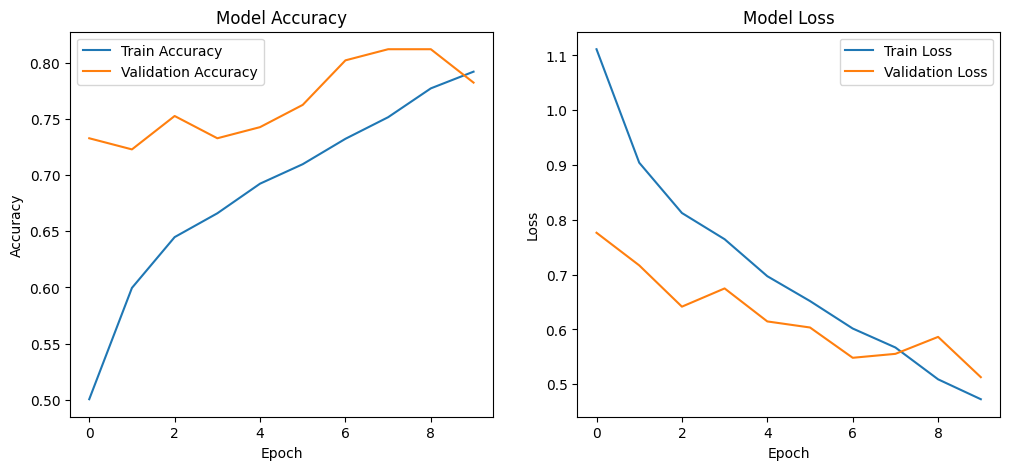

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
Найдено 22 ошибок из 101 тестовых примеров.


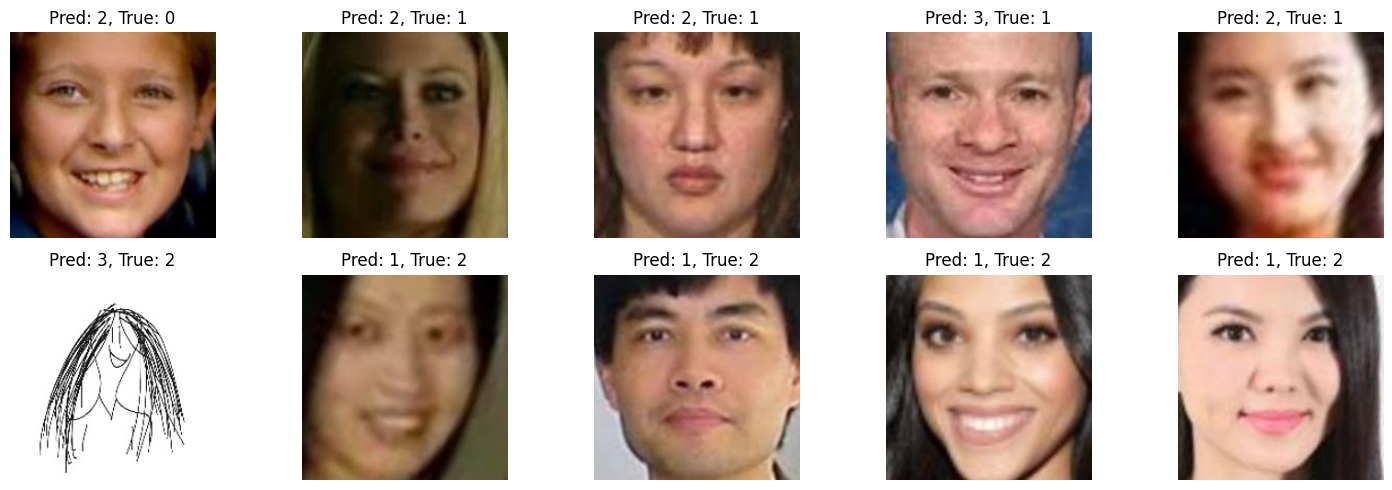

In [30]:
#Searching for errors
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Loading the Model
model = load_model('age_classification_model.h5')

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Calculation of indices where predictions does not match with labels
errors = np.where(predicted_classes != test_labels)[0]
print(f"Found {len(errors)} errors {len(test_labels)} from test samples")

# Visualisation of errors
def plot_errors(errors_indices, num_errors=10):
    plt.figure(figsize=(15, 5))
    for i, error_index in enumerate(errors_indices[:num_errors]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(test_images[error_index])
        plt.title(f"Pred: {predicted_classes[error_index]}, True: {test_labels[error_index]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_errors(errors)


## Task 4 (inference code)
### Also FastAPI web-service provided 

In [10]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def predict_image(model_path, image_path):
    model = load_model(model_path)
    img = Image.open(image_path).resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = img_array[np.newaxis, ...]  # Add batch dimension
    prediction = model.predict(img_array)
    return np.argmax(prediction)

In [16]:
predict_image('age_classification_model.h5', 'data/test/2_50.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


2

### Task 4.2* FastAPI (screenshot)

Testing fastapi web service based on the following picture

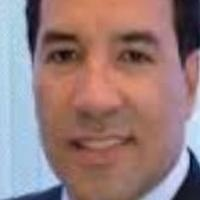

In [19]:
Image(filename='data/test/2_50.jpg') 

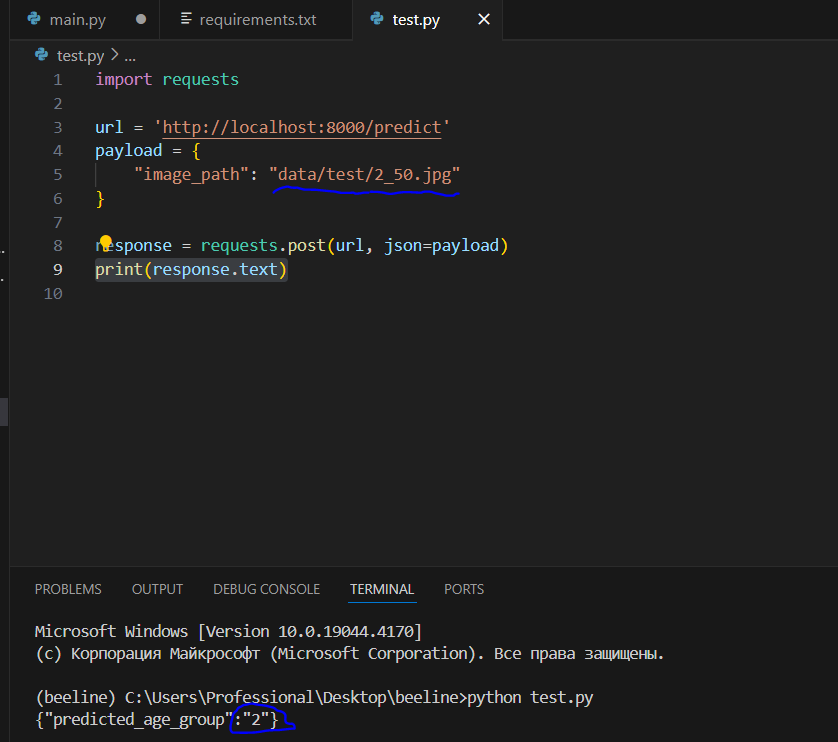

In [18]:
from IPython.display import Image
Image(filename='prediction.png') 

## Task 5

In [44]:
# Accuracy metric
loss, accuracy = model.evaluate(test_images, test_labels)
print("Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8222 - loss: 0.4574
Accuracy: 0.7821782231330872


In [52]:
# Use our model for prediction
predictions = model.predict(test_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


In [27]:
model = load_model('age_classification_model.h5')
predictions = model.predict(test_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


### Calculating the F1 score metric for an unbiased result

In [42]:
from sklearn.metrics import classification_report
predictions_labels = [np.argmax(x) for x in predictions]
print(classification_report(predictions_labels, test_labels))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.84      0.72      0.78        29
           2       0.43      0.62      0.51        16
           3       0.86      0.80      0.83        30

    accuracy                           0.78       101
   macro avg       0.77      0.77      0.76       101
weighted avg       0.81      0.78      0.79       101

